In [1]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [153]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from prophet import Prophet


In [154]:
df_year=pd.read_csv('HistoricalData_1719636576094.csv')
df_5year = pd.read_csv('HistoricalData_5Year.csv')

In [155]:
df_5year.head()

,Date,Close/Last,Open,High,Low
0,06/28/2024,19682.87,19817.00,20017.71,19665.85
1,06/27/2024,19789.03,19740.51,19850.81,19701.34
2,06/26/2024,19751.05,19671.07,19763.55,19654.18
3,06/25/2024,19701.13,19555.84,19712.42,19523.51
4,06/24/2024,19474.62,19648.23,19723.20,19472.53


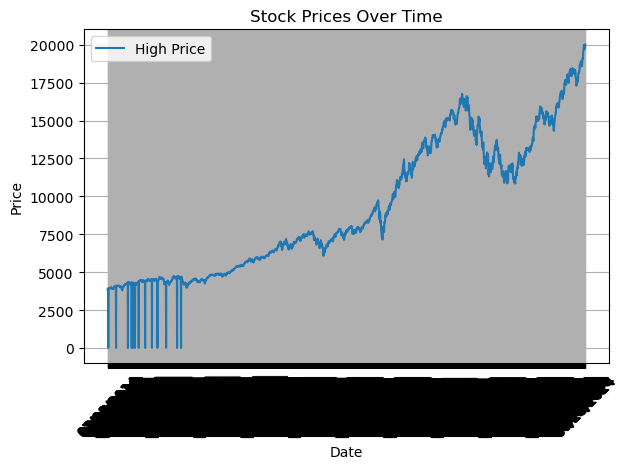

In [258]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Select the Close and High columns

high_data = df_5year["High"]
dates = df_5year["Date"]  # Assuming 'Date' is the date column

# Create the line chart

plt.plot(dates, high_data, label='High Price')
# Reverse the x-axis
plt.gca().invert_xaxis()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')

# Add legend
plt.legend()

# Rotate x-axis labels for readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add gridlines for better visualization (optional)
plt.tight_layout()  # Adjust spacing between elements (optional)
plt.show()


In [156]:
df_5year.tail()

,Date,Close/Last,Open,High,Low
2525,07/04/2014,3923.01,0.00,0.00,0.00
2526,07/03/2014,3923.01,3911.11,3923.15,3901.32
2527,07/02/2014,3899.27,3895.18,3904.35,3890.77
2528,07/01/2014,3894.33,3864.14,3902.93,3863.81
2529,06/30/2014,3849.48,3844.45,3860.65,3841.70


In [157]:
df_5year.shape

(2530, 5)

In [158]:
df_5year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2530 non-null   object 
 1   Close/Last  2530 non-null   float64
 2   Open        2530 non-null   float64
 3   High        2530 non-null   float64
 4   Low         2530 non-null   float64
dtypes: float64(4), object(1)
memory usage: 99.0+ KB


In [159]:
df_5year["ds"] = pd.to_datetime(df_5year["Date"])
# Format the 'ds' column as yyyy-mm-dd
#df_5year["ds"] = df_5year["ds"].dt.strftime('%Y-%m-%d')

In [160]:
df_5year["y"] = df_5year["High"]

In [161]:
df_5year2 = df_5year.set_index("ds")

In [162]:
df_5year2.head()

,Date,Close/Last,Open,High,Low,y
ds,,,,,,
2024-06-28,06/28/2024,19682.87,19817.00,20017.71,19665.85,20017.71
2024-06-27,06/27/2024,19789.03,19740.51,19850.81,19701.34,19850.81
2024-06-26,06/26/2024,19751.05,19671.07,19763.55,19654.18,19763.55
2024-06-25,06/25/2024,19701.13,19555.84,19712.42,19523.51,19712.42
2024-06-24,06/24/2024,19474.62,19648.23,19723.20,19472.53,19723.20


In [163]:
df_5year2.tail()

,Date,Close/Last,Open,High,Low,y
ds,,,,,,
2014-07-04,07/04/2014,3923.01,0.00,0.00,0.00,0.00
2014-07-03,07/03/2014,3923.01,3911.11,3923.15,3901.32,3923.15
2014-07-02,07/02/2014,3899.27,3895.18,3904.35,3890.77,3904.35
2014-07-01,07/01/2014,3894.33,3864.14,3902.93,3863.81,3902.93
2014-06-30,06/30/2014,3849.48,3844.45,3860.65,3841.70,3860.65


In [216]:
train_df = df_5year2.sort_index().loc['2020-06-30':'2022-06-30']
test_df = df_5year2.sort_index().loc['2022-07-01':'2024-06-28']

In [217]:
train_df.head()

,Date,Close/Last,Open,High,Low,y
ds,,,,,,
2020-06-30,06/30/2020,10156.85,9970.21,10185.35,9956.83,10185.35
2020-07-01,07/01/2020,10279.25,10160.41,10321.77,10142.75,10321.77
2020-07-02,07/02/2020,10341.89,10386.38,10432.55,10328.78,10432.55
2020-07-06,07/06/2020,10604.06,10487.70,10625.10,10485.81,10625.10
2020-07-07,07/07/2020,10524.01,10595.94,10704.93,10516.63,10704.93


In [218]:
train_df.tail()

,Date,Close/Last,Open,High,Low,y
ds,,,,,,
2022-06-24,06/24/2022,12105.85,11826.95,12112.82,11812.18,12112.82
2022-06-27,06/27/2022,12008.24,12157.93,12175.98,11965.67,12175.98
2022-06-28,06/28/2022,11637.77,12021.34,12133.87,11633.13,12133.87
2022-06-29,06/29/2022,11658.26,11619.01,11710.21,11537.72,11710.21
2022-06-30,06/30/2022,11503.72,11532.32,11650.96,11322.86,11650.96


In [219]:
test_df.head()

,Date,Close/Last,Open,High,Low,y
ds,,,,,,
2022-07-01,07/01/2022,11585.68,11472.63,11592.85,11378.63,11592.85
2022-07-05,07/05/2022,11779.90,11419.34,11781.74,11366.07,11781.74
2022-07-06,07/06/2022,11852.59,11807.08,11941.31,11727.36,11941.31
2022-07-07,07/07/2022,12109.05,11913.73,12137.71,11897.51,12137.71
2022-07-08,07/08/2022,12125.69,11977.95,12179.32,11956.03,12179.32


In [221]:
test_df.tail()

,Date,Close/Last,Open,High,Low,y
ds,,,,,,
2024-06-24,06/24/2024,19474.62,19648.23,19723.20,19472.53,19723.20
2024-06-25,06/25/2024,19701.13,19555.84,19712.42,19523.51,19712.42
2024-06-26,06/26/2024,19751.05,19671.07,19763.55,19654.18,19763.55
2024-06-27,06/27/2024,19789.03,19740.51,19850.81,19701.34,19850.81
2024-06-28,06/28/2024,19682.87,19817.00,20017.71,19665.85,20017.71


In [222]:
train_df.reset_index()
test_df.reset_index()

,ds,Date,Close/Last,Open,High,Low,y
0,2022-07-01,07/01/2022,11585.68,11472.63,11592.85,11378.63,11592.85
1,2022-07-05,07/05/2022,11779.90,11419.34,11781.74,11366.07,11781.74
2,2022-07-06,07/06/2022,11852.59,11807.08,11941.31,11727.36,11941.31
3,2022-07-07,07/07/2022,12109.05,11913.73,12137.71,11897.51,12137.71
4,2022-07-08,07/08/2022,12125.69,11977.95,12179.32,11956.03,12179.32
...,...,...,...,...,...,...,...
496,2024-06-24,06/24/2024,19474.62,19648.23,19723.20,19472.53,19723.20
497,2024-06-25,06/25/2024,19701.13,19555.84,19712.42,19523.51,19712.42
498,2024-06-26,06/26/2024,19751.05,19671.07,19763.55,19654.18,19763.55
499,2024-06-27,06/27/2024,19789.03,19740.51,19850.81,19701.34,19850.81


In [237]:
train_df["ds"] = pd.to_datetime(train_df["Date"])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-06-30 to 2022-06-30
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        505 non-null    object        
 1   Close/Last  505 non-null    float64       
 2   Open        505 non-null    float64       
 3   High        505 non-null    float64       
 4   Low         505 non-null    float64       
 5   y           505 non-null    float64       
 6   ds          505 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 31.6+ KB


In [238]:
test_df["ds"] = pd.to_datetime(test_df["Date"])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-07-01 to 2024-06-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        501 non-null    object        
 1   Close/Last  501 non-null    float64       
 2   Open        501 non-null    float64       
 3   High        501 non-null    float64       
 4   Low         501 non-null    float64       
 5   y           501 non-null    float64       
 6   ds          501 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 31.3+ KB


In [239]:
m = Prophet()
m.fit(train_df) ## fit the dataframe with y and ds




23:24:03 - cmdstanpy - INFO - Chain [1] start processing
23:24:03 - cmdstanpy - INFO - Chain [1] done processing


In [240]:
future_dataframe = m.make_future_dataframe(periods=365)
future_dataframe

,ds
0,2020-06-30
1,2020-07-01
2,2020-07-02
3,2020-07-06
4,2020-07-07
...,...
865,2023-06-26
866,2023-06-27
867,2023-06-28
868,2023-06-29


In [233]:
future_dataframe.head()

,ds
0,2020-06-30
1,2020-07-01
2,2020-07-02
3,2020-07-06
4,2020-07-07


In [234]:
preds = m.predict(future_dataframe)
preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-30,10441.959521,10006.077682,10755.801081,10441.959521,10441.959521,-54.907396,-54.907396,-54.907396,52.793655,52.793655,52.793655,-107.701050,-107.701050,-107.701050,0.0,0.0,0.0,10387.052126
1,2020-07-01,10455.101610,10073.722123,10818.942096,10455.101610,10455.101610,-2.903861,-2.903861,-2.903861,74.080289,74.080289,74.080289,-76.984150,-76.984150,-76.984150,0.0,0.0,0.0,10452.197749
2,2020-07-02,10468.243698,10120.253626,10855.820203,10468.243698,10468.243698,20.479957,20.479957,20.479957,65.852337,65.852337,65.852337,-45.372379,-45.372379,-45.372379,0.0,0.0,0.0,10488.723656
3,2020-07-06,10520.812053,10233.198978,11011.091982,10520.812053,10520.812053,120.704115,120.704115,120.704115,40.689969,40.689969,40.689969,80.014147,80.014147,80.014147,0.0,0.0,0.0,10641.516168
4,2020-07-07,10533.954141,10313.647591,11072.550592,10533.954141,10533.954141,161.390652,161.390652,161.390652,52.793655,52.793655,52.793655,108.596997,108.596997,108.596997,0.0,0.0,0.0,10695.344793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2023-06-26,4666.593579,1971.529928,7032.577290,2148.673787,7180.005330,-187.505066,-187.505066,-187.505066,40.689969,40.689969,40.689969,-228.195035,-228.195035,-228.195035,0.0,0.0,0.0,4479.088512
866,2023-06-27,4646.262034,1932.811094,6981.143102,2117.371925,7167.939752,-154.596820,-154.596820,-154.596820,52.793655,52.793655,52.793655,-207.390475,-207.390475,-207.390475,0.0,0.0,0.0,4491.665214
867,2023-06-28,4625.930489,2001.063381,7046.453556,2085.207077,7154.984554,-109.788744,-109.788744,-109.788744,74.080289,74.080289,74.080289,-183.869032,-183.869032,-183.869032,0.0,0.0,0.0,4516.141745
868,2023-06-29,4605.598944,1997.455301,7017.475766,2050.238753,7146.471654,-92.061148,-92.061148,-92.061148,65.852337,65.852337,65.852337,-157.913485,-157.913485,-157.913485,0.0,0.0,0.0,4513.537796


/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


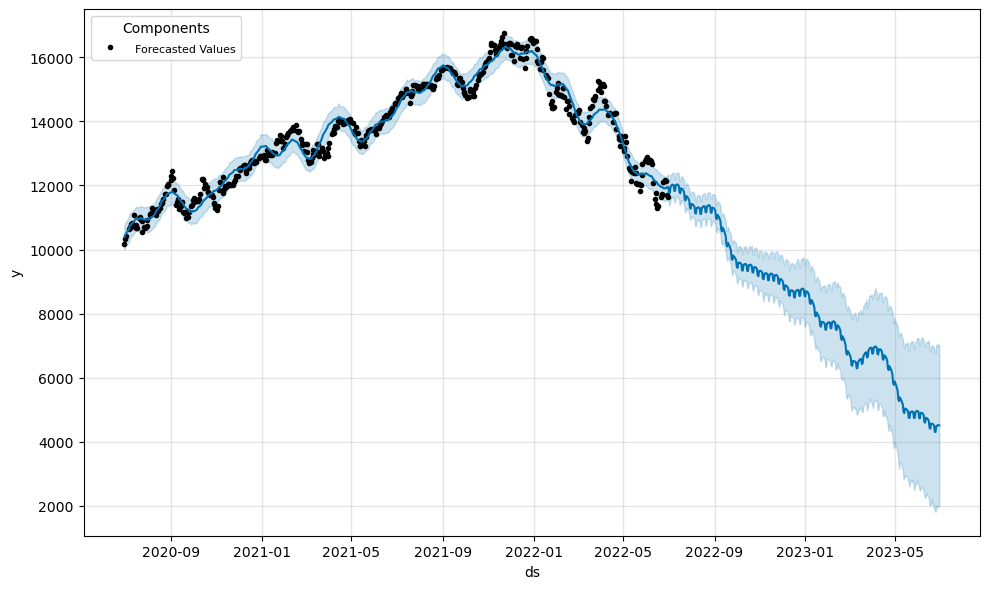

In [235]:
import matplotlib.pyplot as plt

fig1 = m.plot(preds)

# Extract labels for legend (assuming 'yhat' is the forecasted column)
forecast_label = 'Forecasted Values'
# You can add more labels based on additional data you might plot

# Create a legend object
legend = plt.legend([forecast_label], loc='upper left', title='Components')

# Adjust legend appearance (optional)
legend.get_title().set_fontsize(10)  # Adjust title font size
for label in legend.get_texts():
    label.set_fontsize(8)  # Adjust label font size

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

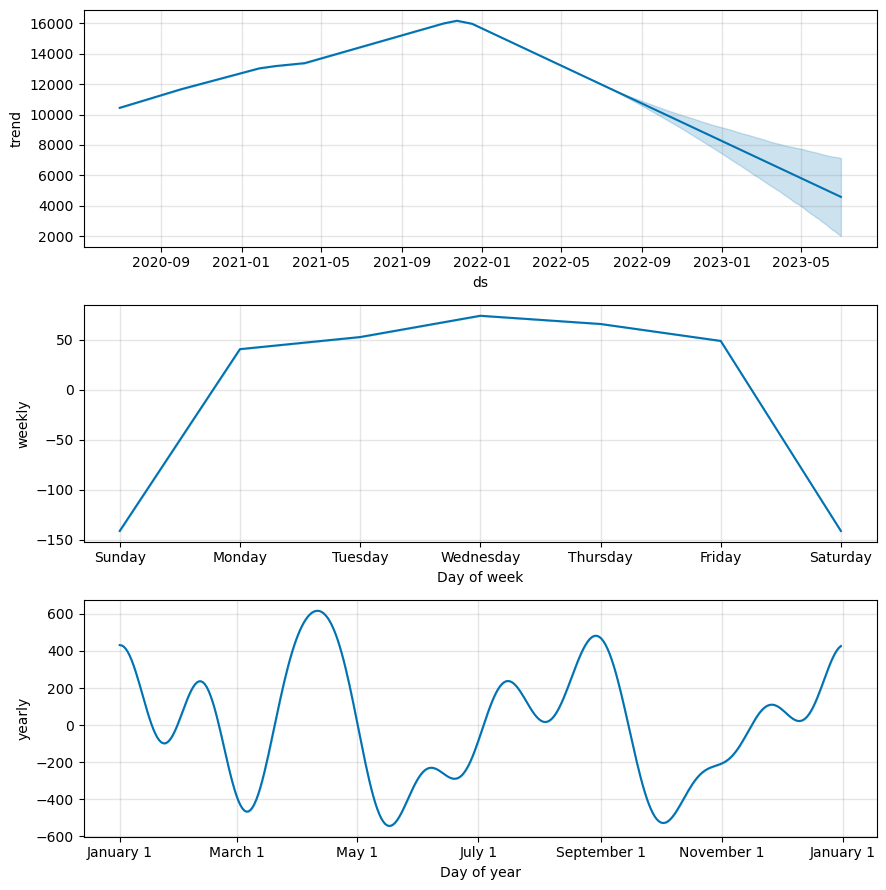

In [236]:
fig2 = m.plot_components(preds)

In [241]:
single_all = pd.concat([train_df,test_df])
single_all

,Date,Close/Last,Open,High,Low,y,ds
ds,,,,,,,
2020-06-30,06/30/2020,10156.85,9970.21,10185.35,9956.83,10185.35,2020-06-30
2020-07-01,07/01/2020,10279.25,10160.41,10321.77,10142.75,10321.77,2020-07-01
2020-07-02,07/02/2020,10341.89,10386.38,10432.55,10328.78,10432.55,2020-07-02
2020-07-06,07/06/2020,10604.06,10487.70,10625.10,10485.81,10625.10,2020-07-06
2020-07-07,07/07/2020,10524.01,10595.94,10704.93,10516.63,10704.93,2020-07-07
...,...,...,...,...,...,...,...
2024-06-24,06/24/2024,19474.62,19648.23,19723.20,19472.53,19723.20,2024-06-24
2024-06-25,06/25/2024,19701.13,19555.84,19712.42,19523.51,19712.42,2024-06-25
2024-06-26,06/26/2024,19751.05,19671.07,19763.55,19654.18,19763.55,2024-06-26


In [242]:
m_full = Prophet()
m_full.fit(single_all) ## fit the dataframe with y and ds


23:25:21 - cmdstanpy - INFO - Chain [1] start processing
23:25:21 - cmdstanpy - INFO - Chain [1] done processing


In [243]:
full_pred = m_full.predict(test_df)
full_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-01,12380.687015,11984.528888,12900.399959,12380.687015,12380.687015,67.242324,67.242324,67.242324,10.440894,10.440894,10.440894,56.801430,56.801430,56.801430,0.0,0.0,0.0,12447.929339
1,2022-07-05,12315.553921,11980.704697,12919.878933,12315.553921,12315.553921,123.847148,123.847148,123.847148,1.403945,1.403945,1.403945,122.443203,122.443203,122.443203,0.0,0.0,0.0,12439.401069
2,2022-07-06,12299.270648,12021.122802,12926.684033,12299.270648,12299.270648,159.874072,159.874072,159.874072,18.228750,18.228750,18.228750,141.645322,141.645322,141.645322,0.0,0.0,0.0,12459.144720
3,2022-07-07,12282.987374,11989.360831,12933.296516,12282.987374,12282.987374,185.265658,185.265658,185.265658,23.349578,23.349578,23.349578,161.916080,161.916080,161.916080,0.0,0.0,0.0,12468.253032
4,2022-07-08,12266.704101,12003.378074,12913.033274,12266.704101,12266.704101,193.626884,193.626884,193.626884,10.440894,10.440894,10.440894,183.185991,183.185991,183.185991,0.0,0.0,0.0,12460.330985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2024-06-24,19549.329575,19044.934430,19972.429355,19549.329575,19549.329575,-10.960365,-10.960365,-10.960365,6.805093,6.805093,6.805093,-17.765458,-17.765458,-17.765458,0.0,0.0,0.0,19538.369210
497,2024-06-25,19565.331003,19094.354400,20041.817018,19565.331003,19565.331003,-6.680483,-6.680483,-6.680483,1.403945,1.403945,1.403945,-8.084428,-8.084428,-8.084428,0.0,0.0,0.0,19558.650520
498,2024-06-26,19581.332431,19147.179773,20093.248310,19581.332431,19581.332431,20.300497,20.300497,20.300497,18.228750,18.228750,18.228750,2.071747,2.071747,2.071747,0.0,0.0,0.0,19601.632928
499,2024-06-27,19597.333859,19185.391722,20114.339490,19597.333859,19597.333859,36.176824,36.176824,36.176824,23.349578,23.349578,23.349578,12.827246,12.827246,12.827246,0.0,0.0,0.0,19633.510683


In [244]:
future_values= m_full.make_future_dataframe(periods=365)

In [245]:
preds_full = m_full.predict(future_values)
preds_full

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-30,10159.508285,9755.205986,10646.926529,10159.508285,10159.508285,51.223256,51.223256,51.223256,1.403945,1.403945,1.403945,49.819310,49.819310,49.819310,0.0,0.0,0.0,10210.731541
1,2020-07-01,10176.128884,9801.302353,10702.777673,10176.128884,10176.128884,82.271840,82.271840,82.271840,18.228750,18.228750,18.228750,64.043090,64.043090,64.043090,0.0,0.0,0.0,10258.400724
2,2020-07-02,10192.749483,9859.036771,10785.559394,10192.749483,10192.749483,102.682439,102.682439,102.682439,23.349578,23.349578,23.349578,79.332861,79.332861,79.332861,0.0,0.0,0.0,10295.431922
3,2020-07-06,10259.231879,9961.219555,10874.307652,10259.231879,10259.231879,158.455940,158.455940,158.455940,6.805093,6.805093,6.805093,151.650847,151.650847,151.650847,0.0,0.0,0.0,10417.687820
4,2020-07-07,10275.852478,9995.875560,10915.374802,10275.852478,10275.852478,173.835455,173.835455,173.835455,1.403945,1.403945,1.403945,172.431510,172.431510,172.431510,0.0,0.0,0.0,10449.687934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,2025-06-24,25389.850847,21207.488117,29844.724919,21232.462161,29913.400291,-18.722431,-18.722431,-18.722431,1.403945,1.403945,1.403945,-20.126377,-20.126377,-20.126377,0.0,0.0,0.0,25371.128416
1367,2025-06-25,25405.852275,21151.508853,29979.573773,21218.503981,29949.167390,7.684464,7.684464,7.684464,18.228750,18.228750,18.228750,-10.544286,-10.544286,-10.544286,0.0,0.0,0.0,25413.536740
1368,2025-06-26,25421.853703,21071.796718,30039.786114,21214.313743,29984.934490,22.830861,22.830861,22.830861,23.349578,23.349578,23.349578,-0.518716,-0.518716,-0.518716,0.0,0.0,0.0,25444.684565
1369,2025-06-27,25437.855131,21220.015771,30007.385798,21210.297623,30020.701589,20.516494,20.516494,20.516494,10.440894,10.440894,10.440894,10.075600,10.075600,10.075600,0.0,0.0,0.0,25458.371625


/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


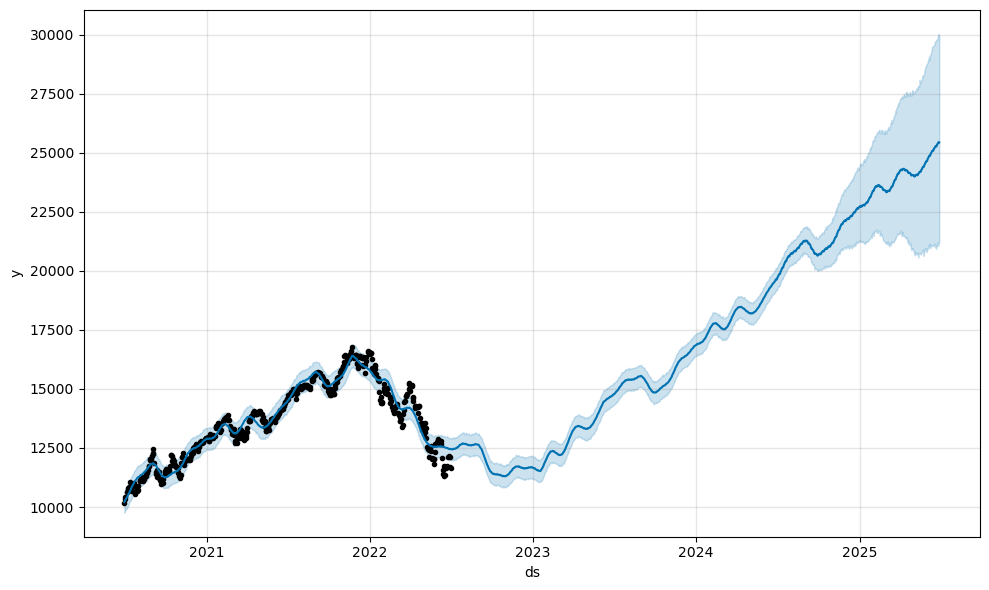

In [246]:
fig1 = m.plot(preds_full)

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

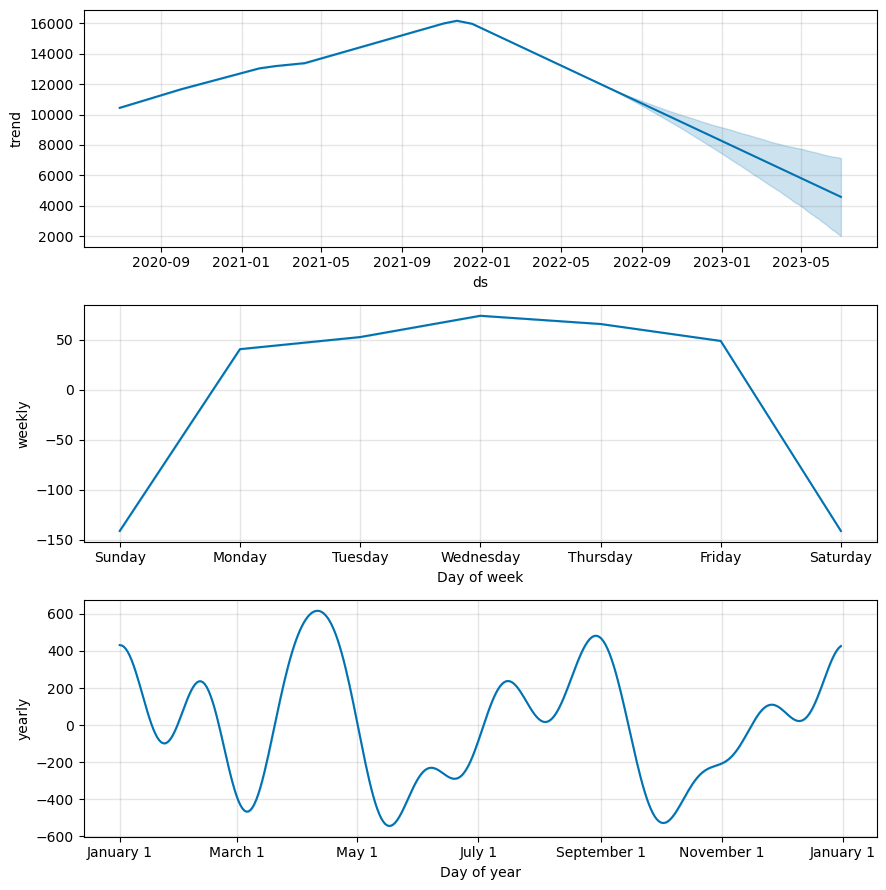

In [247]:
fig2 = m.plot_components(preds)


In [248]:
preds.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
865,2023-06-26,4666.593579,1971.529928,7032.577290,2148.673787,7180.005330,-187.505066,-187.505066,-187.505066,40.689969,40.689969,40.689969,-228.195035,-228.195035,-228.195035,0.0,0.0,0.0,4479.088512
866,2023-06-27,4646.262034,1932.811094,6981.143102,2117.371925,7167.939752,-154.596820,-154.596820,-154.596820,52.793655,52.793655,52.793655,-207.390475,-207.390475,-207.390475,0.0,0.0,0.0,4491.665214
867,2023-06-28,4625.930489,2001.063381,7046.453556,2085.207077,7154.984554,-109.788744,-109.788744,-109.788744,74.080289,74.080289,74.080289,-183.869032,-183.869032,-183.869032,0.0,0.0,0.0,4516.141745
868,2023-06-29,4605.598944,1997.455301,7017.475766,2050.238753,7146.471654,-92.061148,-92.061148,-92.061148,65.852337,65.852337,65.852337,-157.913485,-157.913485,-157.913485,0.0,0.0,0.0,4513.537796
869,2023-06-30,4585.267399,1968.795303,7013.935792,2015.326832,7140.904133,-80.956654,-80.956654,-80.956654,48.911737,48.911737,48.911737,-129.868391,-129.868391,-129.868391,0.0,0.0,0.0,4504.310745


In [261]:
print(preds_full[['ds', 'yhat', 'yhat_upper']].tail(365))

             ds          yhat    yhat_upper
1006 2024-06-29  19635.821202  20146.346217
1007 2024-06-30  19665.043307  20150.040710
1008 2024-07-01  19732.187754  20173.012795
1009 2024-07-02  19758.077806  20229.742499
1010 2024-07-03  19807.302217  20297.688918
...         ...           ...           ...
1366 2025-06-24  25371.128416  29844.724919
1367 2025-06-25  25413.536740  29979.573773
1368 2025-06-26  25444.684565  30039.786114
1369 2025-06-27  25458.371625  30007.385798
1370 2025-06-28  25445.100885  29989.777412

[365 rows x 3 columns]


In [262]:
preds_full[['ds', 'yhat', 'yhat_upper']].tail(365).to_csv('Nasdaq.csv')